In [ ]:
import keras
from matplotlib import pyplot
from keras.datasets import mnist
from keras.layers import Input, Conv2D, MaxPooling2D,  Conv2DTranspose, UpSampling2D
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))


11493376/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


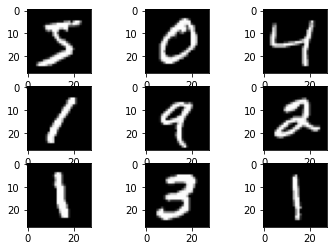

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
X_train = trainX
X_test = testX
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

(60000, 28, 28)


In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_train = X_train/255
X_test  = X_test/255

y_train = X_train
y_test = X_test

noise_factor = 0.5
X_train = X_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test = X_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train = np.clip(X_train, 0.0, 1.0)
X_test = np.clip(X_test, 0.0, 1.0)

In [ ]:
def encoder(input_img):
    x = Conv2D(filters=8, kernel_size=4,strides=2 ,activation="relu")(input_img) #13x13x8
    x = Conv2D(filters=16, kernel_size=3,strides=2 ,activation="relu")(x) # 6x6x16
    x = Conv2D(filters=32, kernel_size=2,strides=2 ,activation="relu")(x) # 2x2x32
    return x

In [ ]:
def decoder(encoded_img):
    y = Conv2DTranspose(filters=16, kernel_size=2,strides=2 ,activation="relu")(encoded_img) #6x6x16
    y = Conv2DTranspose(filters=8, kernel_size=3,strides=2 ,activation="relu")(y) #13x13x8
    y = Conv2DTranspose(filters=1, kernel_size=4,strides=2 ,activation="relu")(y) #28x28x1
    return y

In [ ]:
input_img = Input(shape=(28,28,1))
encoded_img = encoder(input_img)
decoded_img = decoder(encoded_img)

In [ ]:
model = Model(inputs = input_img, outputs = decoded_img)
model.compile(optimizer = "adam", loss = "binary_crossentropy")

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 8)         136       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 16)          1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          2080      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 6, 6, 16)          2064      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 13, 13, 8)         1160      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)        

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[early_stopper])

Epoch 1/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2211 - val_loss: 0.1783
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1674 - val_loss: 0.1583
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1570 - val_loss: 0.1467
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1459 - val_loss: 0.1497
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1449 - val_loss: 0.1370
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1513 - val_loss: 0.1412
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1383 - val_loss: 0.1338
Epoch 8/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1352 - val_loss: 0.1300
Epoch 9/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1585 - val_loss: 0.1433
Epoch 10/100
1500/1500 [==============================] - 4s 3ms/step - l

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


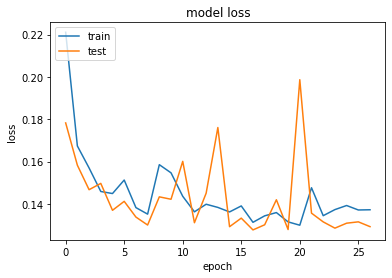

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
predictions = model.predict(X_test)

In [ ]:
op = predictions[9].reshape(28,28)

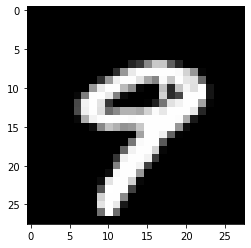

In [ ]:
pyplot.imshow(y_test[9].reshape(28,28), cmap=pyplot.get_cmap('gray'))

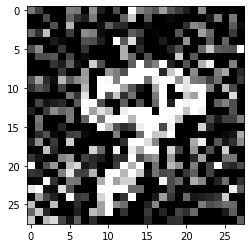

In [ ]:
pyplot.imshow(X_test[9].reshape(28,28), cmap=pyplot.get_cmap('gray'))

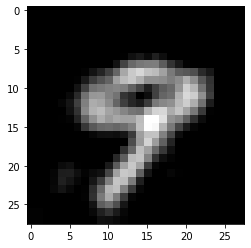

In [ ]:
pyplot.imshow(op, cmap=pyplot.get_cmap('gray'))

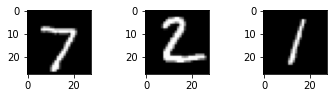

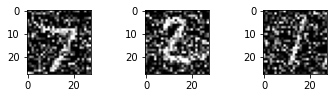

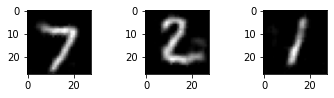

In [ ]:
for i in range(3):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(y_test[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

for i in range(3):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_test[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

for i in range(3):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(predictions[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()